https://stats.stackexchange.com/questions/466425/variance-of-standardized-studentized-residuals-equal-to-1-in-least-squares-regre

## 회귀진단

In [47]:
install.packages("showtext")
library(showtext)
font_add(family = "NanumGothic",
         regular = "/usr/share/fonts/nanum/NanumGothic.ttf",
         bold = "/usr/share/fonts/nanum/NanumGothicBold.ttf")
par(family = "NanumGothic")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
font_families()

[1] "sans"         "serif"        "mono"         "wqy-microhei" "NanumGothic"

In [48]:
options(repr.plot.width = 16, repr.plot.height = 9)

In [7]:
library(lmtest)
library(ggplot2)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [8]:
dt <- data.frame(x = c(15,26,10,9,15,20,18,11,
                 8,20,7,9,10,11,11,10,12,42,17,11,10),
                 y = c(95,71,83,91,102,87,93,100,
                 104,94,113,96,83,84,102,100,
                 105,57,121,86,100))

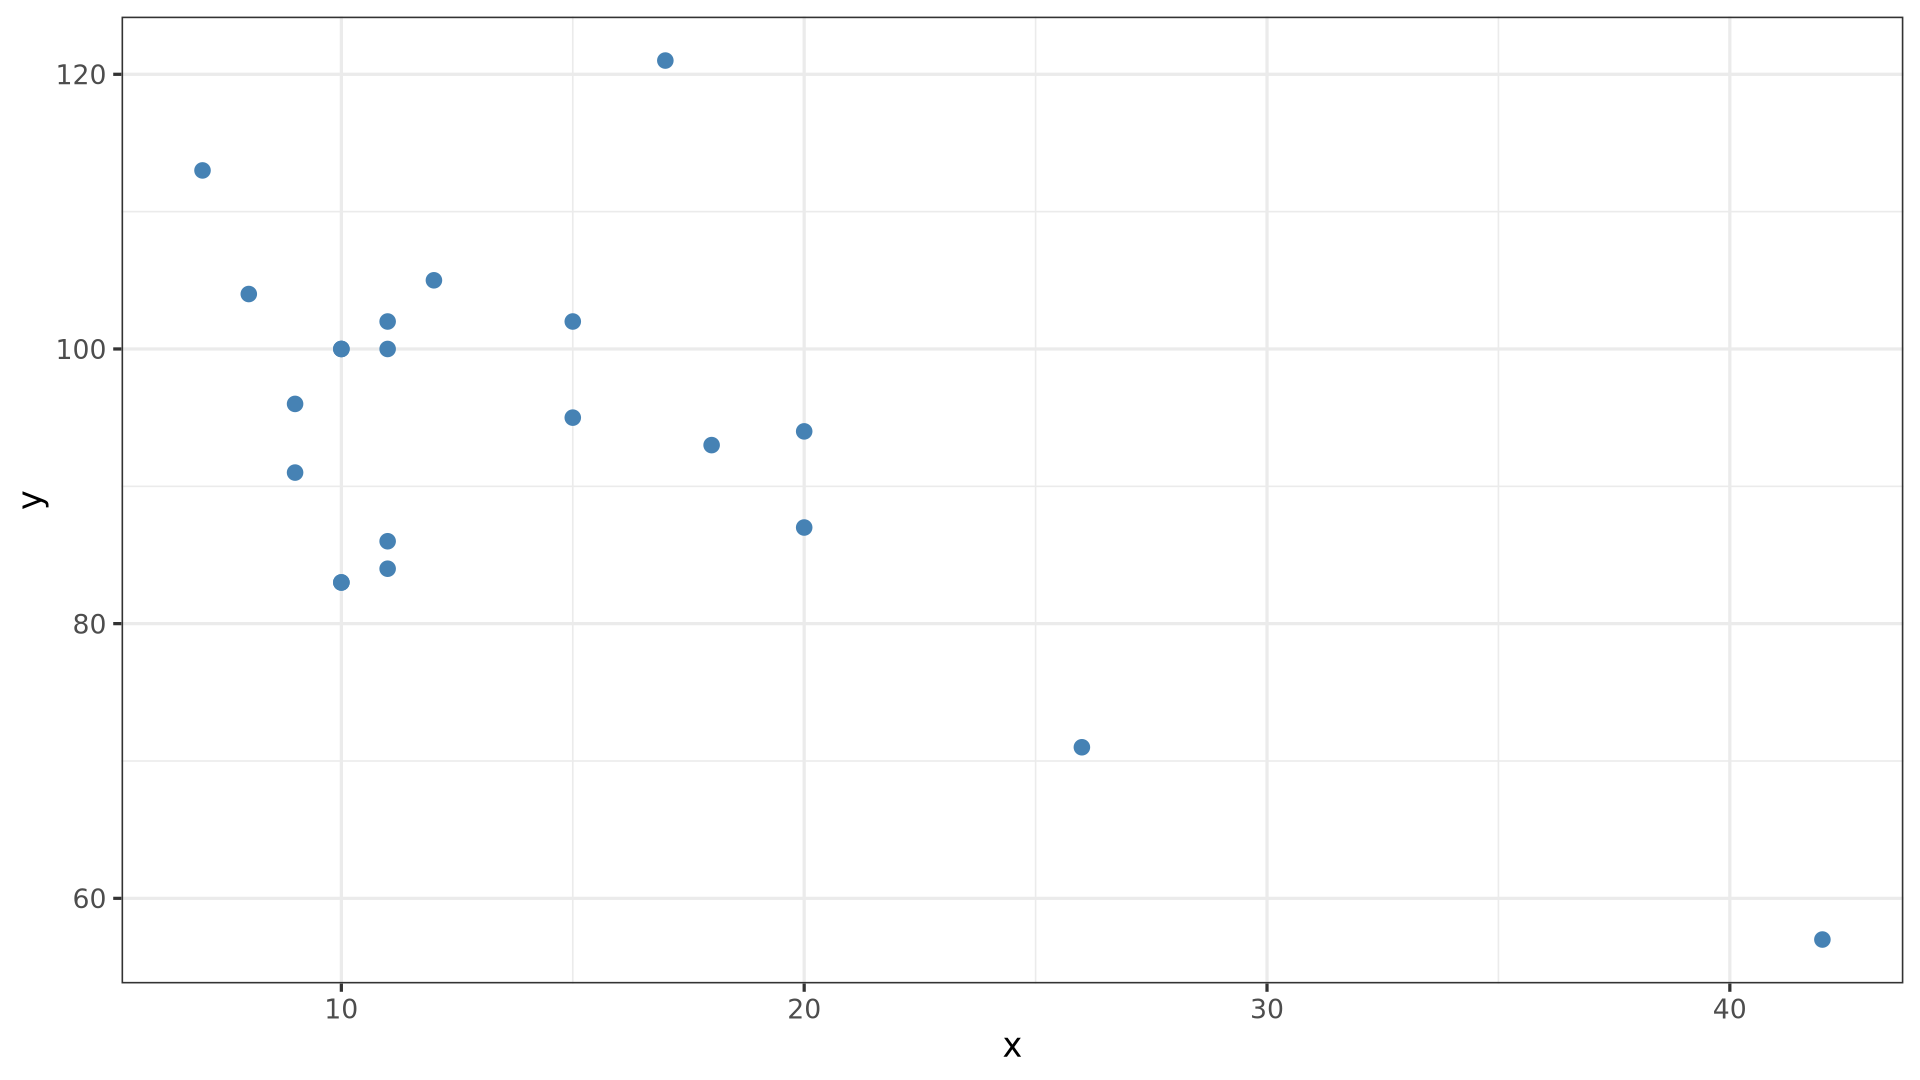

In [9]:
ggplot(data = dt, aes(x, y)) +
    geom_point(col = "steelblue", size = 4) +
    theme_bw(base_size = 20)

`-` 회귀적합

In [10]:
model_reg = lm(y~x, dt)
summary(model_reg)


Call:
lm(formula = y ~ x, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.604  -8.731   1.396   4.523  30.285 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 109.8738     5.0678  21.681 7.31e-15 ***
x            -1.1270     0.3102  -3.633  0.00177 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.02 on 19 degrees of freedom
Multiple R-squared:   0.41,	Adjusted R-squared:  0.3789 
F-statistic:  13.2 on 1 and 19 DF,  p-value: 0.001769


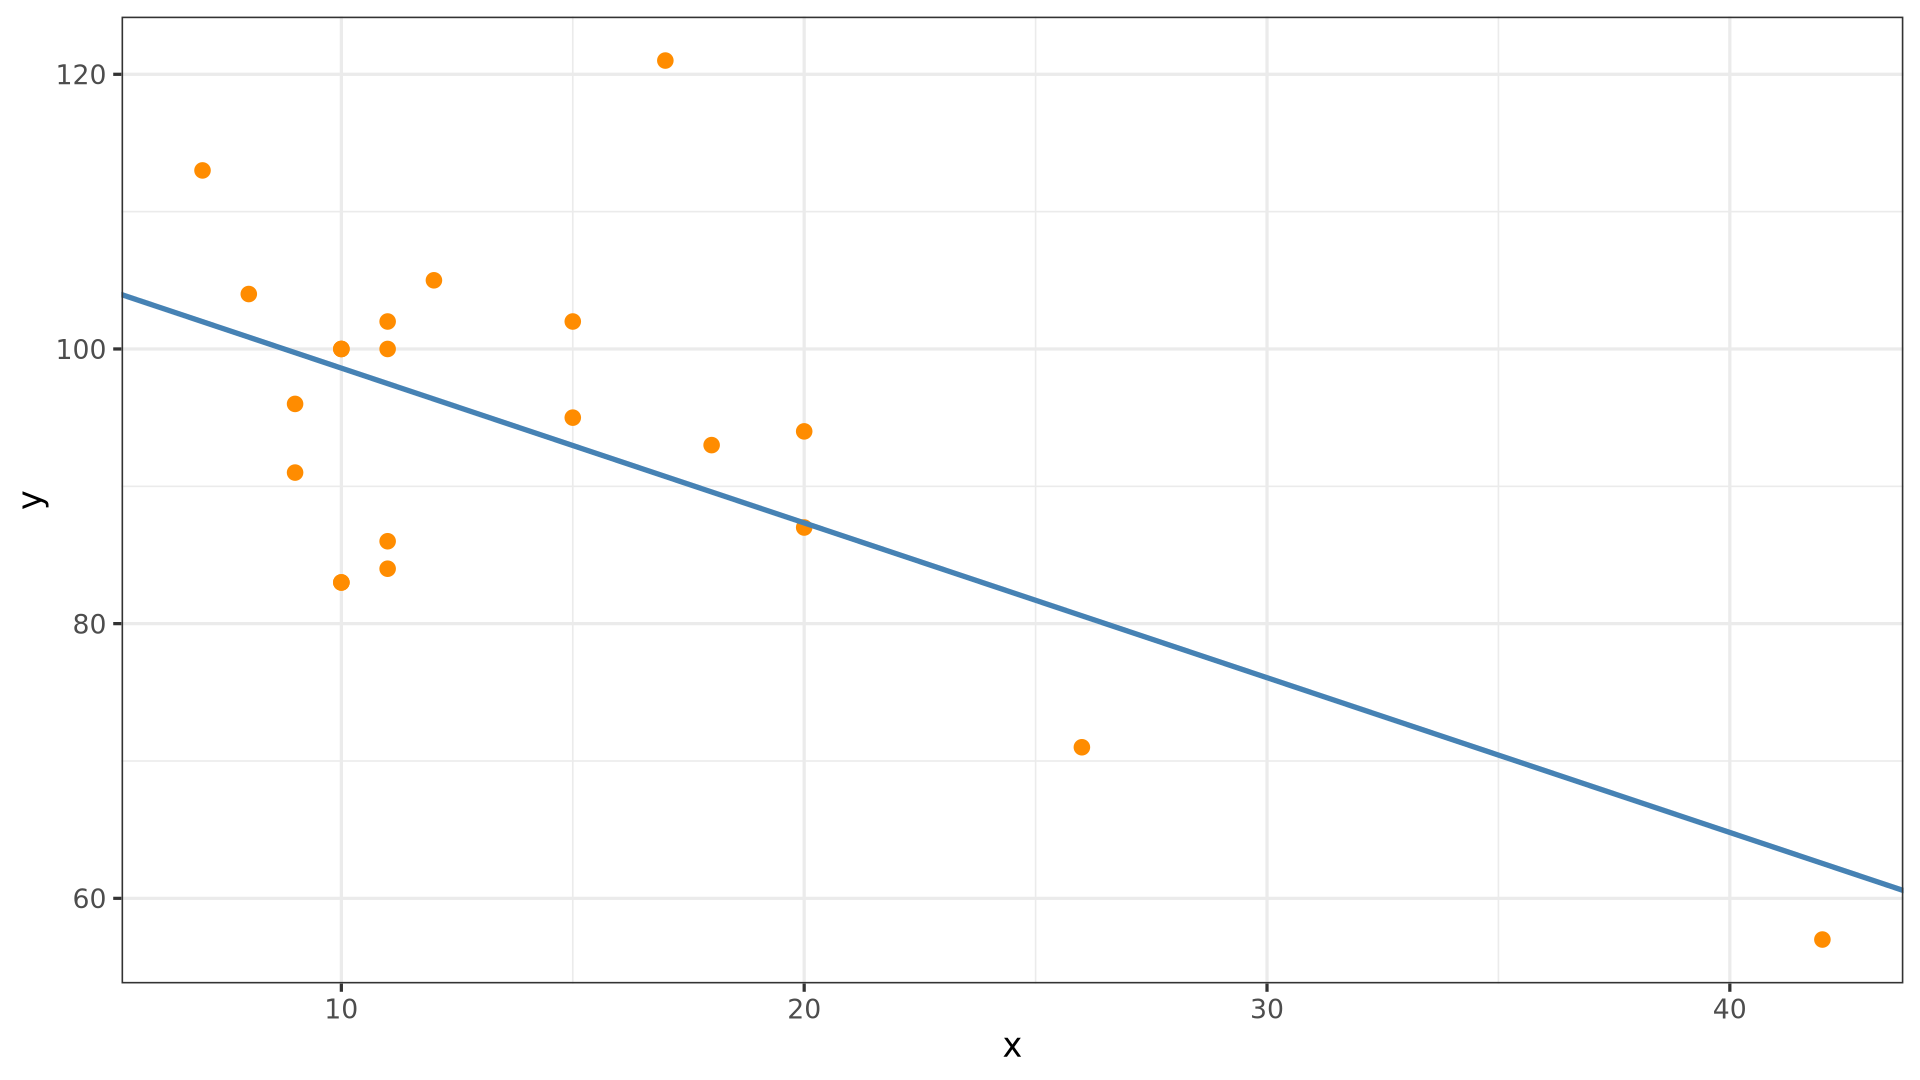

In [11]:
ggplot(data = dt, aes(x, y)) +
    geom_point(col = "darkorange", size = 4) +
    theme_bw(base_size = 20) +
    geom_abline(slope = coef(model_reg)[2],
                intercept = coef(model_reg)[1],
                col = "steelblue", lwd = 1.5)

### 잔차

*  $e_i = y_i - \hat y_i$

In [12]:
residual = model_reg$residuals

* 내적으로 표준화된 잔차 : $$r_i = \frac{e_i}{\hat \sigma \sqrt{1 - h_{ii}}}, ~ \hat \sigma^2 = MSE$$

In [13]:
s_residual = rstandard(model_reg)

## 또는
# n = nrow(dt)
# s_xx = sum((dt$x-mean(dt$x))^2)
# h_ii = 1/n + (dt$x - mean(dt$x))^2/s_xx  ## influence(model_reg)$hat
# hat_sigma = summary(model_reg)$sigma
# s_residul = residul/(hat_sigma*sqrt(1-h_ii))
s_residual

1           2           3           4           5           6 
 0.18883222 -0.94440639 -1.46226437 -0.82158155  0.83965939 -0.03147039 
          7           8           9          10          11          12 
 0.31891861  0.23566531  0.29716139  0.62796572  1.04797524 -0.35108151 
         13          14          15          16          17          18 
-1.46226437 -1.25882099  0.42247610  0.13082533  0.80601240 -0.85153932 
         19          20          21 
 2.82336807 -1.07201020  0.13082533

* 외적으로 스튜던트화된 잔차 : $$r_i = \frac{e_i}{\hat \sigma_{(i)} \sqrt{1 - h_{ii}}}, ~ \hat \sigma^2 = [(n-p-1)\hat \sigma^2 - \frac{e_i^2}{1 - h_{ii}}]/(n-p-2)$$

In [14]:
s_residual_i = rstudent(model_reg)

## 또는
# n = nrow(dt)
# h_ii = 1/n + (dt$x - mean(dt$x))^2/s_xx
# hat_sigma_i = sqrt(((n-1-1)*summary(model_reg)$sigma^2 - residul^2/(1-h_ii))/(n-1-2))  ## influence(model_reg)$sigma
# s_residul_i = residul/(hat_sigma_i*sqrt(1-h_ii))
s_residual_i

1           2           3           4           5           6 
 0.18396849 -0.94158335 -1.51081192 -0.81426336  0.83286292 -0.03063183 
          7           8           9          10          11          12 
 0.31124676  0.22971575  0.28991014  0.61766026  1.05084716 -0.34283148 
         13          14          15          16          17          18 
-1.51081192 -1.27977575  0.41315320  0.12739342  0.79828114 -0.84511086 
         19          20          21 
 3.60697972 -1.07648108  0.12739342

`-` 잔차 그림

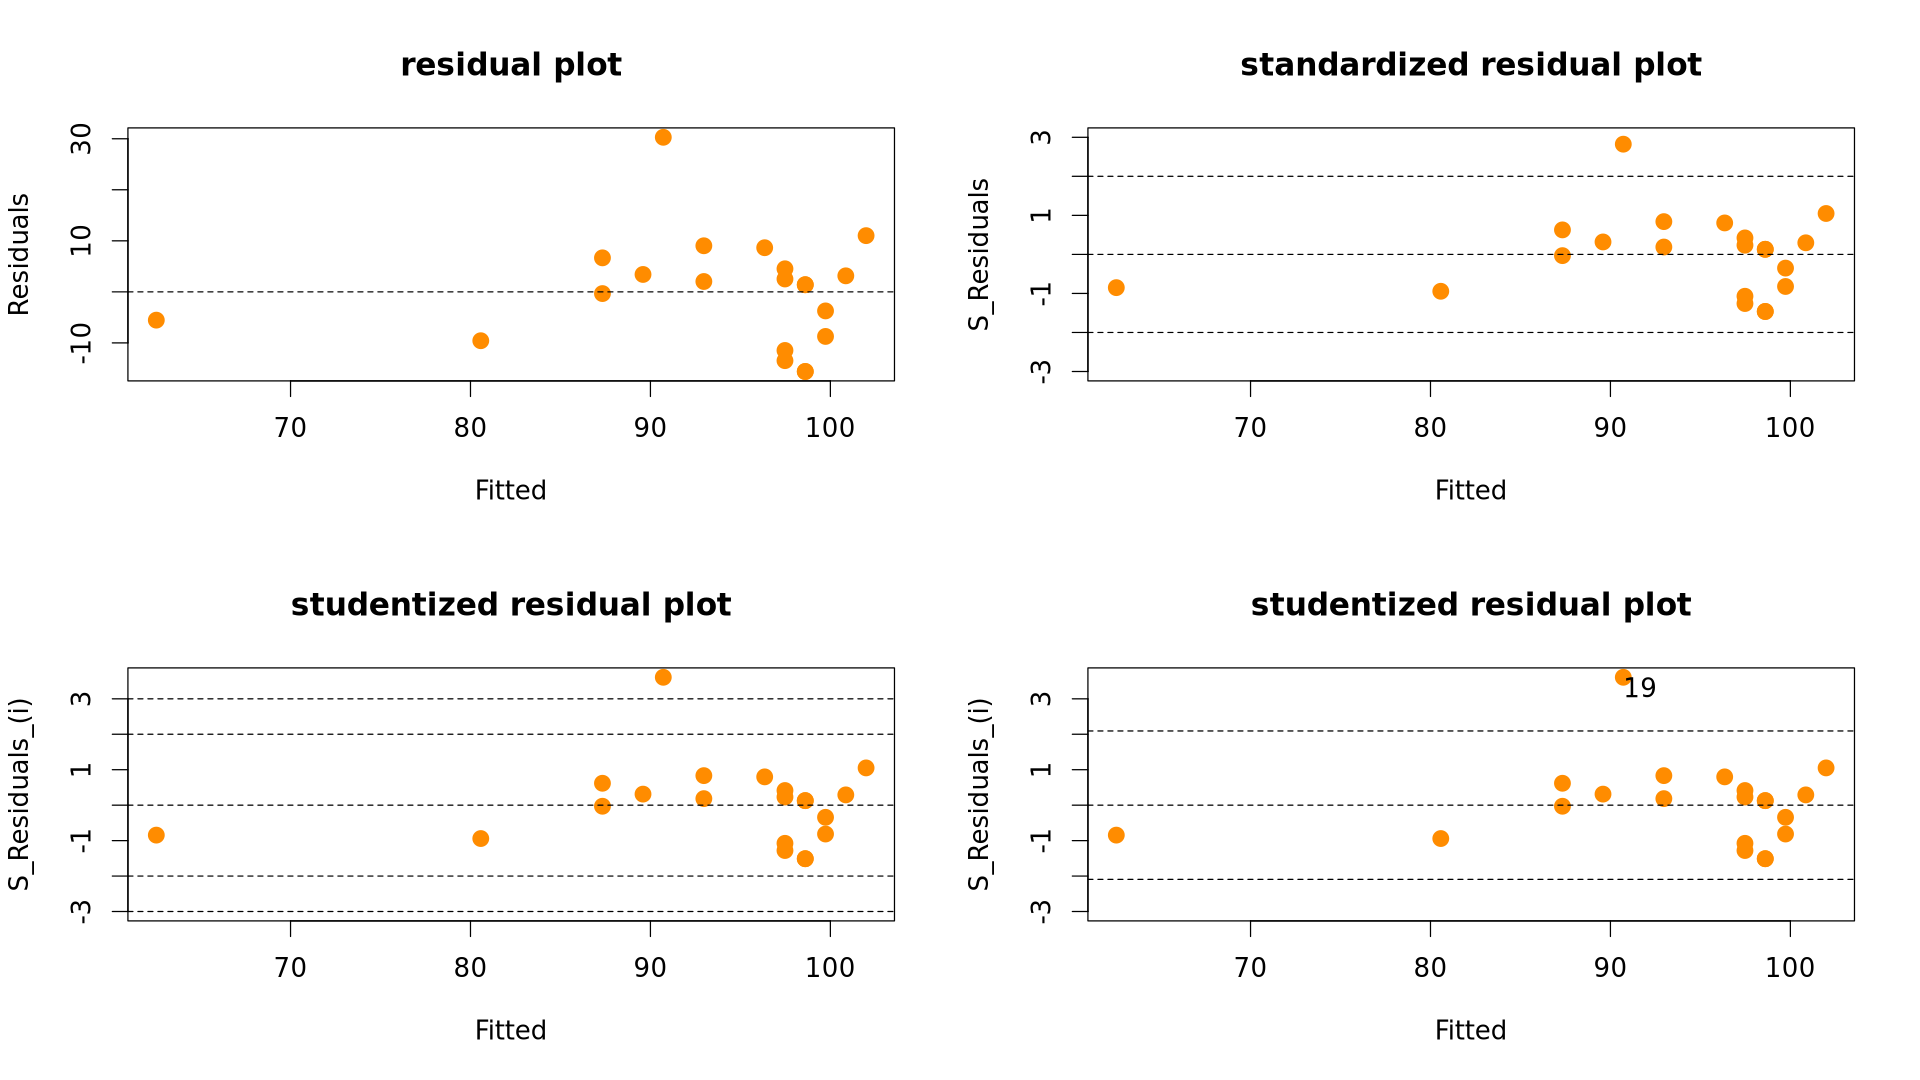

In [15]:
par(mfrow = c(2, 2), cex = 1.3)

## formal
plot(fitted(model_reg), residual,
    pch=20,cex = 2,col = "darkorange",
    xlab = "Fitted", ylab = "Residuals",
    main = "residual plot")
abline(h=0, lty=2)

## standarized(internal)
plot(fitted(model_reg), s_residual,
    pch=20,cex = 2,col = "darkorange",
    xlab = "Fitted", ylab = "S_Residuals",
    ylim=c(min(-3, min(s_residual)),
    max(3,max(s_residual))),
    main = "standardized residual plot")
abline(h=c(-2,0,2), lty=2)  ## 95%

## studentized(external)
plot(fitted(model_reg), s_residual_i,
    pch=20,cex = 2,col = "darkorange",
    xlab = "Fitted", ylab = "S_Residuals_(i)",
    ylim=c(min(-3, min(s_residual_i)),
    max(3,max(s_residual_i))),
    main = "studentized residual plot")
abline(h=c(-3,-2,0,2,3), lty=2)  ## t-quantile이 아닌 2, 3 표시

## studentized(external) : showing outlier
plot(fitted(model_reg), s_residual_i,
    pch=20,cex = 2,col = "darkorange",
    xlab = "Fitted", ylab = "S_Residuals_(i)",
    ylim=c(min(-3, min(s_residual_i)),
    max(3,max(s_residual_i))),
    main = "studentized residual plot")
abline(h=c(-qt(0.975,21-2),0,qt(0.975,21-2)), lty=2)  ## t-quantile에 해당하는 선 추가
text(fitted(model_reg)[which(abs(s_residual_i)>qt(0.975,21-2))],  ## y hat
    s_residual_i[which(abs(s_residual_i)>qt(0.975,21-2))],  ## r
    which(abs(s_residual_i)>qt(0.975,21-2)),adj = c(0,1))  ## index 19

`-` 이상치 검정

* 기각역 : $|r_i^*| ≥ t_{\alpha/2}(n-p-2)$ (externally studentized residual)

In [16]:
qt(0.975, 21-1-2)

[1] 2.100922

In [17]:
s_residual_i[which(abs(s_residual_i) >= qt(0.975, 21-1-2))]

19 
3.60698

> 19번째 값만 유의수준 $\alpha = 0.05$에서 이상치

`-` 정규성 검정

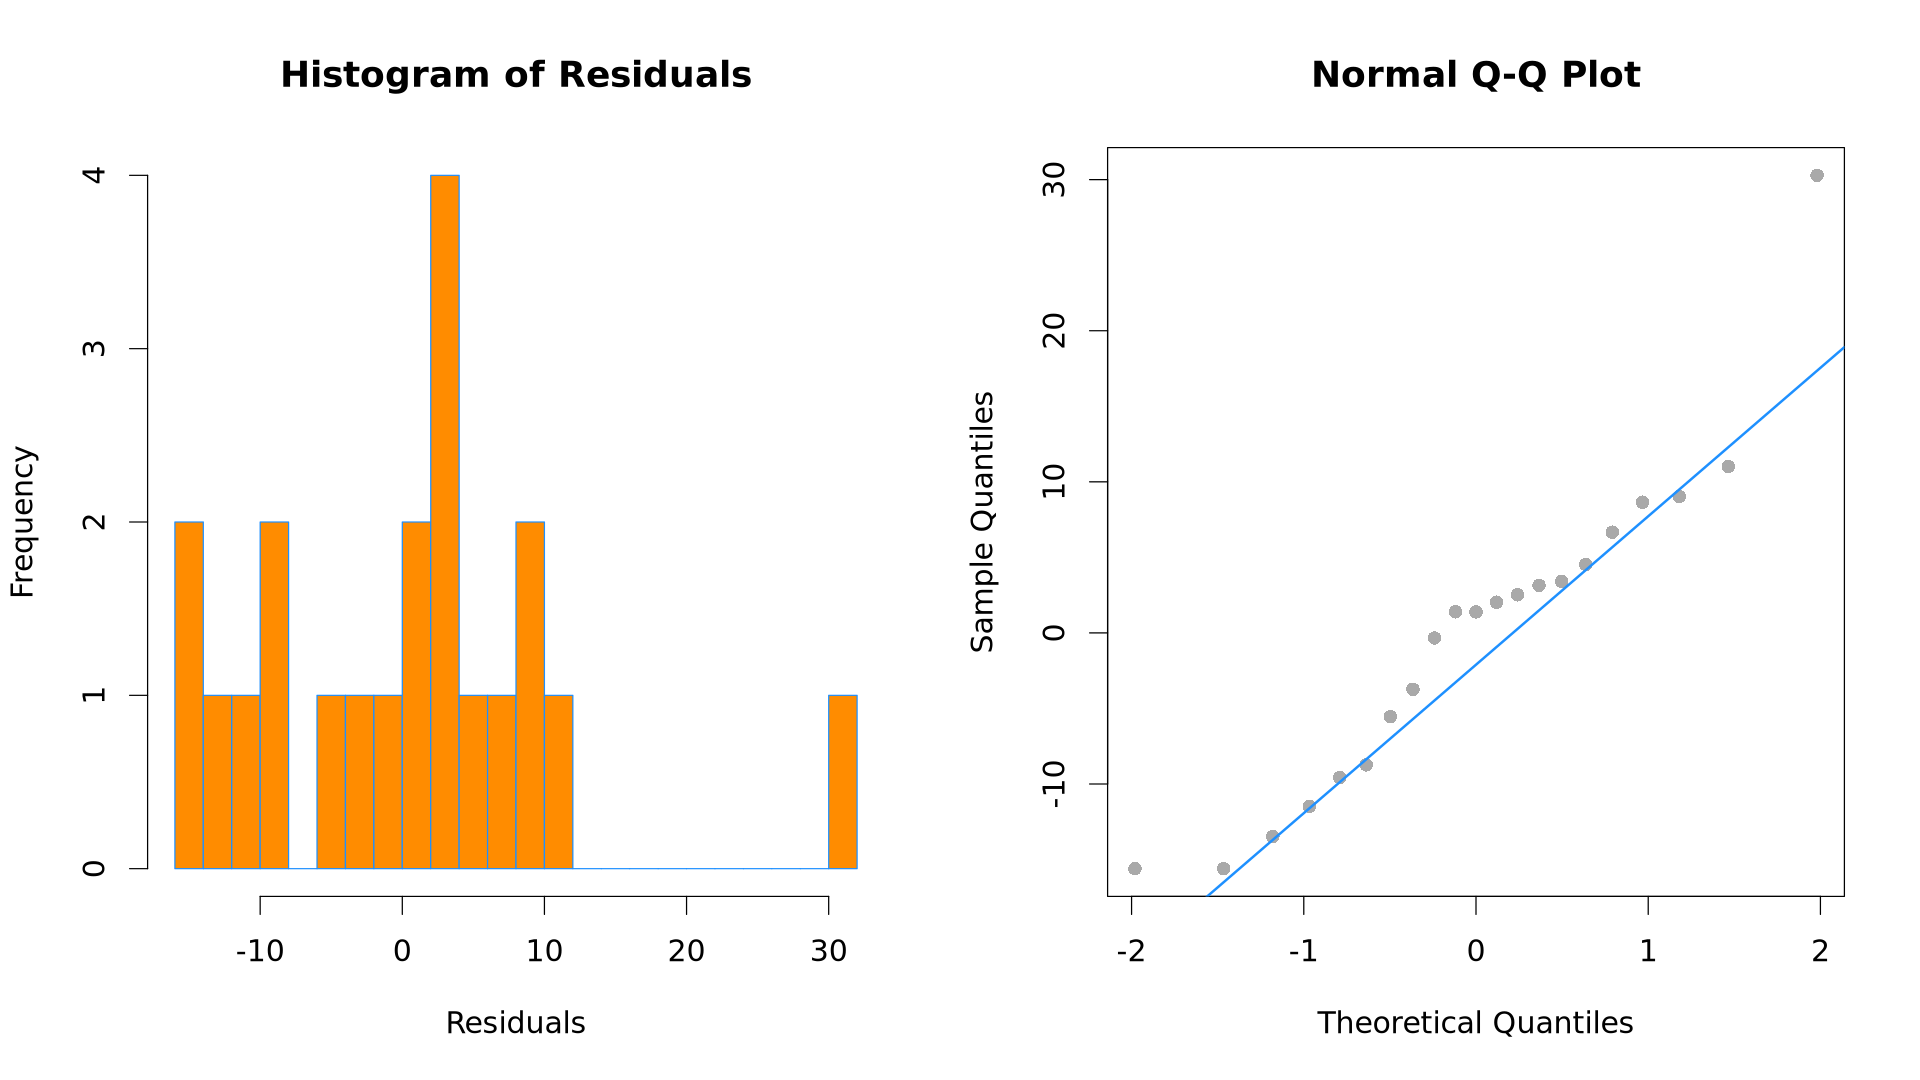

In [18]:
par(mfrow=c(1,2), cex=1.5)
hist(resid(model_reg),
    xlab = "Residuals",
    main = "Histogram of Residuals",
    col = "darkorange",
    border = "dodgerblue",
    breaks = 20)
qqnorm(resid(model_reg),
    main = "Normal Q-Q Plot",
    col = "darkgrey",
    pch=16)
qqline(resid(model_reg), col = "dodgerblue", lwd = 2)

> 이상치가 있으면 일반적으로 정규분포를 따른다고 하기 어려움. 실제로 2에 해당하는 게 튀어나와있음.

In [19]:
shapiro.test(resid(model_reg))


	Shapiro-Wilk normality test

data:  resid(model_reg)
W = 0.92578, p-value = 0.1133


> 근데 기각은 못하네요...

`-` 독립성 검정

In [20]:
dwtest(model_reg, alternative = "two.sided")


	Durbin-Watson test

data:  model_reg
DW = 2.0844, p-value = 0.8567
alternative hypothesis: true autocorrelation is not 0


> 기각 못함. 자기상관 없음.

### 영향점

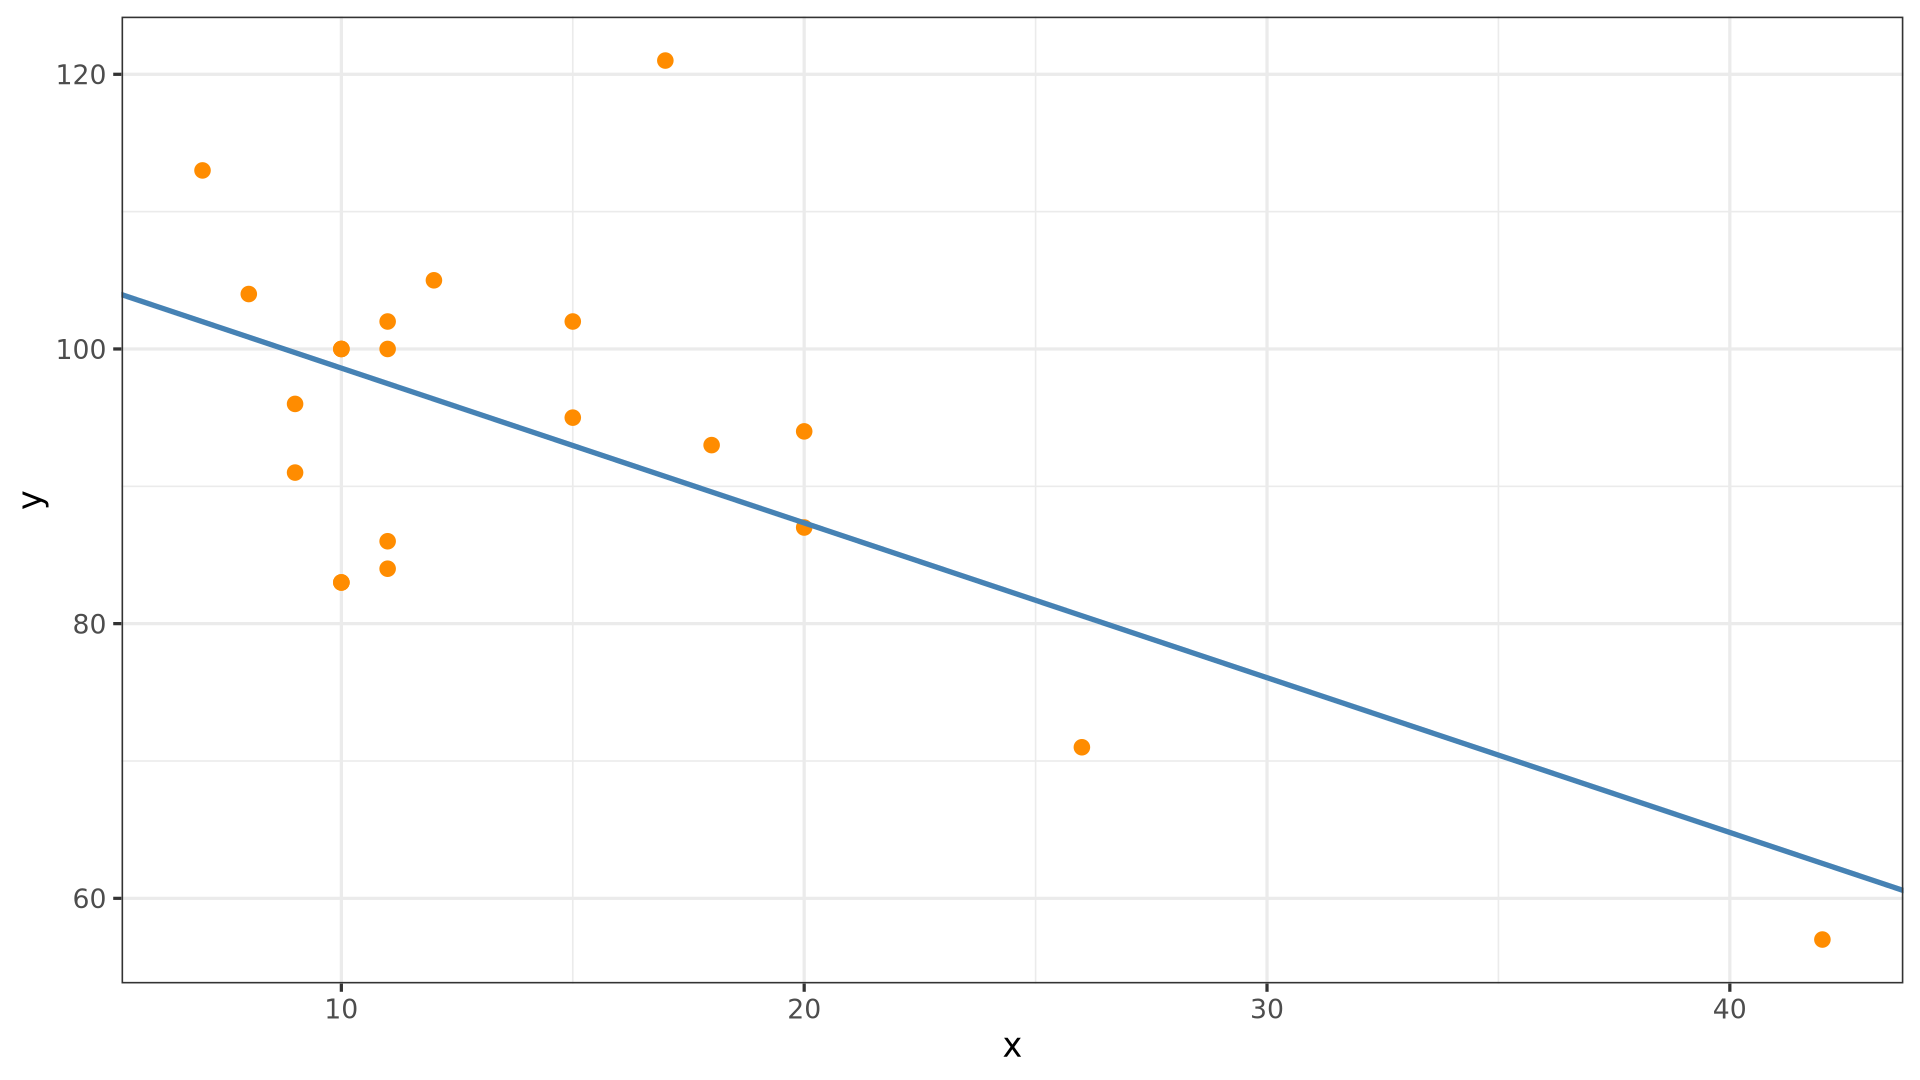

In [21]:
ggplot(dt, aes(x, y)) +
     geom_point(size=4, col = "darkorange") +
     theme_bw(base_size = 20) +
     geom_abline(slope = coef(model_reg)[2],
     intercept = coef(model_reg)[1],
     col= 'steelblue', lwd=1.5)

In [22]:
influence(model_reg)

,(Intercept),x
1,0.086545033,0.001045618
2,0.958749611,-0.104156236
3,-1.623423657,0.057755211
4,-1.022877601,0.040022565
5,0.384830249,0.004649436
6,0.005894578,-0.001602673
7,0.023216186,0.010379001
8,0.230329653,-0.007159985
9,0.410719785,-0.017252806
10,-0.117621441,0.031980023


In [23]:
influence.measures(model_reg)

Influence measures of
	 lm(formula = y ~ x, data = dt) :

     dfb.1_    dfb.x    dffit cov.r   cook.d    hat inf
1   0.01664  0.00328  0.04127 1.166 8.97e-04 0.0479    
2   0.18862 -0.33480 -0.40252 1.197 8.15e-02 0.1545    
3  -0.33098  0.19239 -0.39114 0.936 7.17e-02 0.0628    
4  -0.20004  0.12788 -0.22433 1.115 2.56e-02 0.0705    
5   0.07532  0.01487  0.18686 1.085 1.77e-02 0.0479    
6   0.00113 -0.00503 -0.00857 1.201 3.88e-05 0.0726    
7   0.00447  0.03266  0.07722 1.170 3.13e-03 0.0580    
8   0.04430 -0.02250  0.05630 1.174 1.67e-03 0.0567    
9   0.07907 -0.05427  0.08541 1.200 3.83e-03 0.0799    
10 -0.02283  0.10141  0.17284 1.152 1.54e-02 0.0726    
11  0.31560 -0.22889  0.33200 1.088 5.48e-02 0.0908    
12 -0.08422  0.05384 -0.09445 1.183 4.68e-03 0.0705    
13 -0.33098  0.19239 -0.39114 0.936 7.17e-02 0.0628    
14 -0.24681  0.12536 -0.31367 0.992 4.76e-02 0.0567    
15  0.07968 -0.04047  0.10126 1.159 5.36e-03 0.0567    
16  0.02791 -0.01622  0.03298 1.187 5.74e-04 0

dfb.1_ : i번째 관측값을 뺐을 때 계수의 차이

dfb.x : i번째 관측값을 뺐을 때 기울기의 차이(x)

DFFIT, Cook's distance

In [24]:
hatvalues(model_reg)

1          2          3          4          5          6          7 
0.04792248 0.15451323 0.06281578 0.07054521 0.04792248 0.07261896 0.05798959 
         8          9         10         11         12         13         14 
0.05666993 0.07985823 0.07261896 0.09075485 0.07054521 0.06281578 0.05666993 
        15         16         17         18         19         20         21 
0.05666993 0.06281578 0.05210768 0.65160998 0.05305030 0.05666993 0.06281578

In [25]:
dffits(model_reg)

1            2            3            4            5            6 
 0.041274036 -0.402520687 -0.391140045 -0.224328534  0.186855984 -0.008571736 
           7            8            9           10           11           12 
 0.077223953  0.056303487  0.085407473  0.172840518  0.331996854 -0.094449643 
          13           14           15           16           17           18 
-0.391140045 -0.313673908  0.101264129  0.032981383  0.187166128 -1.155778731 
          19           20           21 
 0.853737107 -0.263846244  0.032981383

In [26]:
cooks.distance(model_reg)

1            2            3            4            5            6 
8.974064e-04 8.149796e-02 7.165814e-02 2.561596e-02 1.774366e-02 3.877627e-05 
           7            8            9           10           11           12 
3.130575e-03 1.668209e-03 3.831949e-03 1.543952e-02 5.481014e-02 4.677623e-03 
          13           14           15           16           17           18 
7.165814e-02 4.759781e-02 5.361216e-03 5.735845e-04 1.785650e-02 6.781120e-01 
          19           20           21 
2.232883e-01 3.451889e-02 5.735845e-04

In [27]:
summary(influence.measures(model_reg))

Potentially influential observations of
	 lm(formula = y ~ x, data = dt) :

   dfb.1_ dfb.x   dffit   cov.r   cook.d hat    
18  0.83  -1.11_* -1.16_*  2.96_*  0.68   0.65_*
19  0.14   0.27    0.85    0.40_*  0.22   0.05  


> 18, 19번째 관측치가 영향점이 될 가능성이 있다.

`-` 기각역

*  $|DFFITS| ≥ 2 \sqrt{\frac{p+1}{n-p-1}} \Rightarrow$ 영향점. 제거했을 때 해당 관측치의 예측값이 얼마나 차이가 나는지
*  $D(i) ≥ F_{0.5}(p+1, n-p-1)$이면 영향점. 계수가 얼마나 차이가 나는지
*  $h_{ii} > 2\bar h$이면 leverage point

In [28]:
p = 1
n = 21

In [117]:
2*(p+1)/n  ## h_bar

[1] 0.03041825

> 18번째는 지렛대점

In [30]:
2*sqrt((p+1)/(n-p-1))   ## DFFITS

[1] 0.6488857

> 18, 19는 DFFITS로 검정했을 때 영향점

In [31]:
qf(0.5, p+1, n-p-1)  ## Cook's d

[1] 0.7190606

> 18번째가 기각역에 거의 가까우므로 영향점이라 할 수 있음.

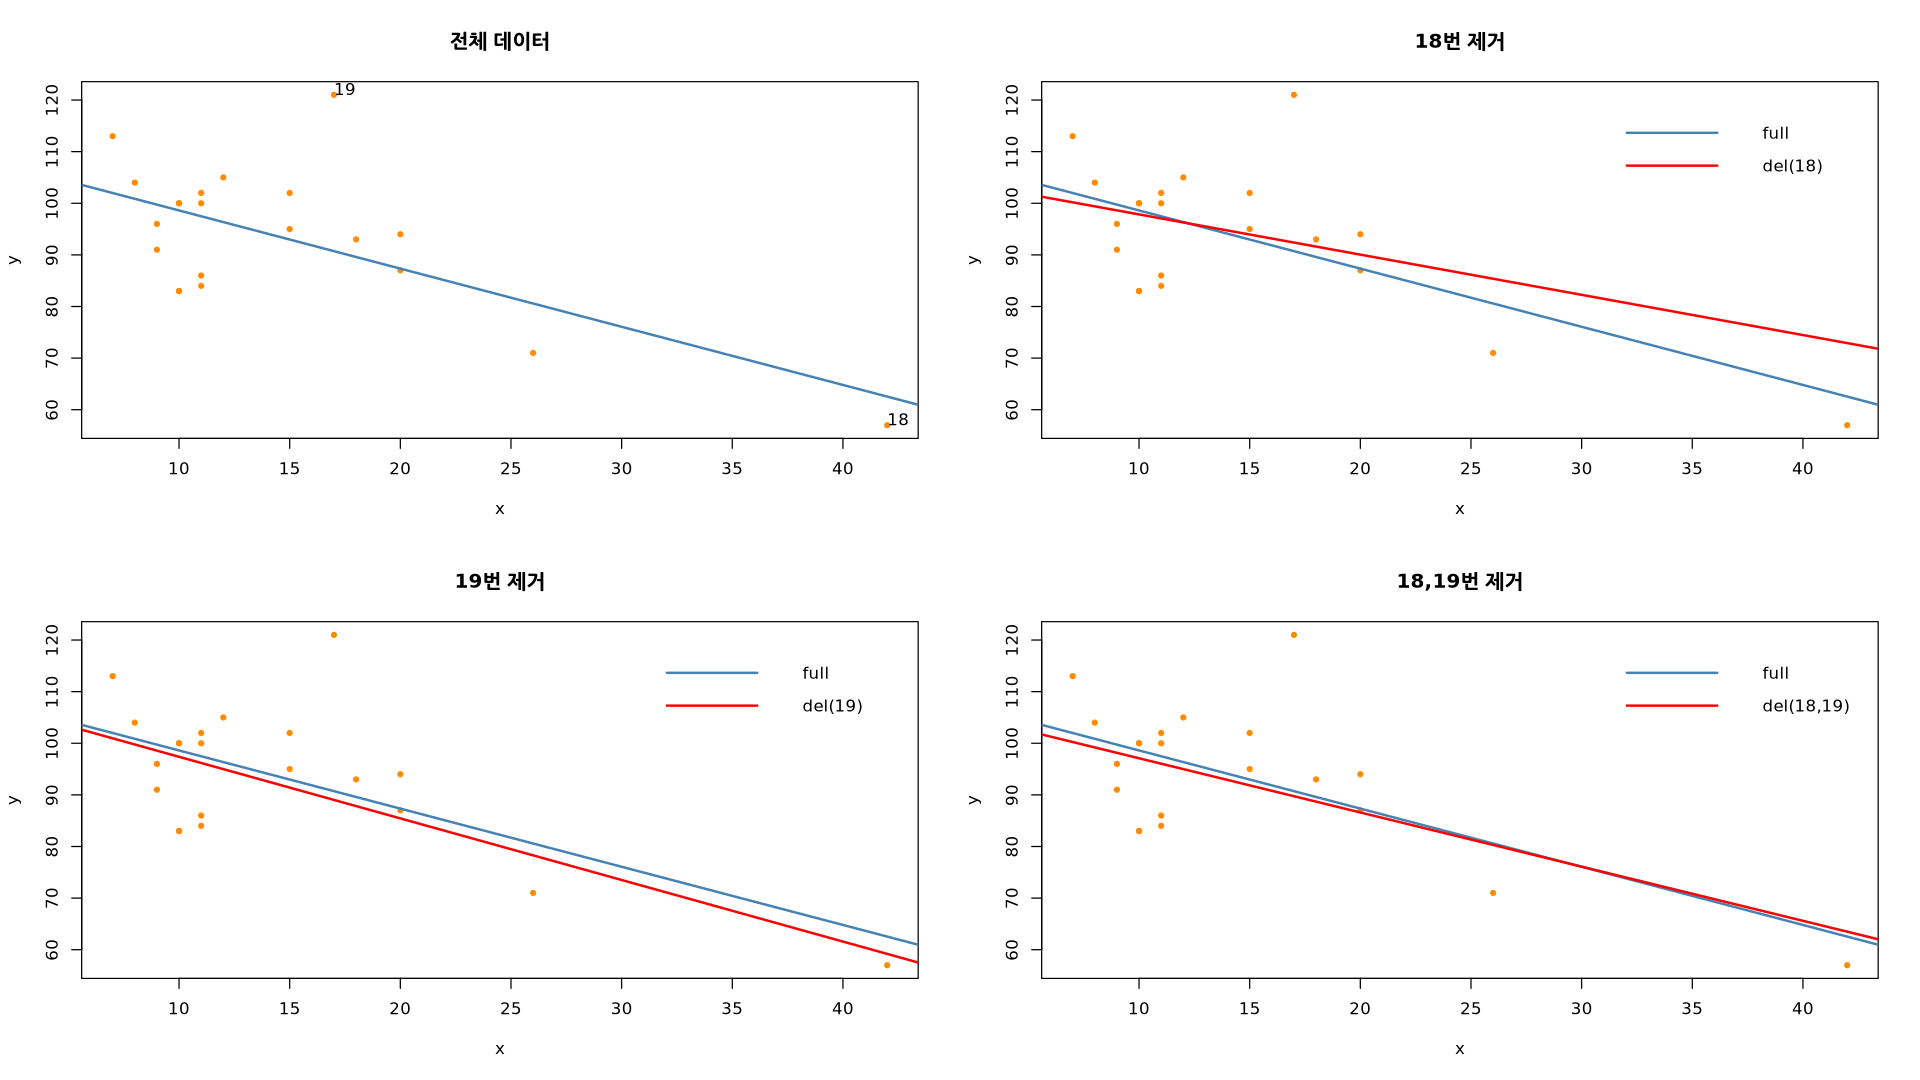

In [32]:
par(mfrow=c(2,2))
plot(y~x, dt,pch = 20,
    col = "darkorange",
    main = "전체 데이터")
abline(model_reg, col='steelblue', lwd=2)
text (dt[18:19,],c('18', '19'),adj = c(0,0))
## 18제거 전후
plot(y~x, dt,pch = 20,
    col = "darkorange",
    main = "18번 제거")
abline(model_reg, col='steelblue', lwd=2)
abline(lm(y~x, dt[-18,]), col='red', lwd=2)
    legend(x=30, y=120, legend=c("full", "del(18)"),
    col=c('steelblue', 'red'), lty=1, lwd=2, bty='n')
# high leverage and high influence, not outlier
## 19제거 전후
plot(y~x, dt,pch = 20,
    col = "darkorange",
    main = "19번 제거")
abline(model_reg, col='steelblue', lwd=2)
abline(lm(y~x, dt[-19,]), col='red', lwd=2)
    legend(x=30, y=120, legend=c("full", "del(19)"),
    col=c('steelblue', 'red'), lty=1, lwd=2, bty='n')
# not leverage and high influence, outlier
## 18, 19제거 전후
plot(y~x, dt,pch = 20,
    col = "darkorange",
    main = "18,19번 제거")
abline(model_reg, col='steelblue', lwd=2)
abline(lm(y~x, dt[-c(18,19),]), col='red', lwd=2)
    legend(x=30, y=120, legend=c("full", "del(18,19)"),
    col=c('steelblue', 'red'), lty=1, lwd=2, bty='n')

> 각각 제거했을 때 영향이 있음. 18번이 제일 큼. 근데 둘다 제거하면 거의 변화가 없다.

`-` 회귀진단 그림

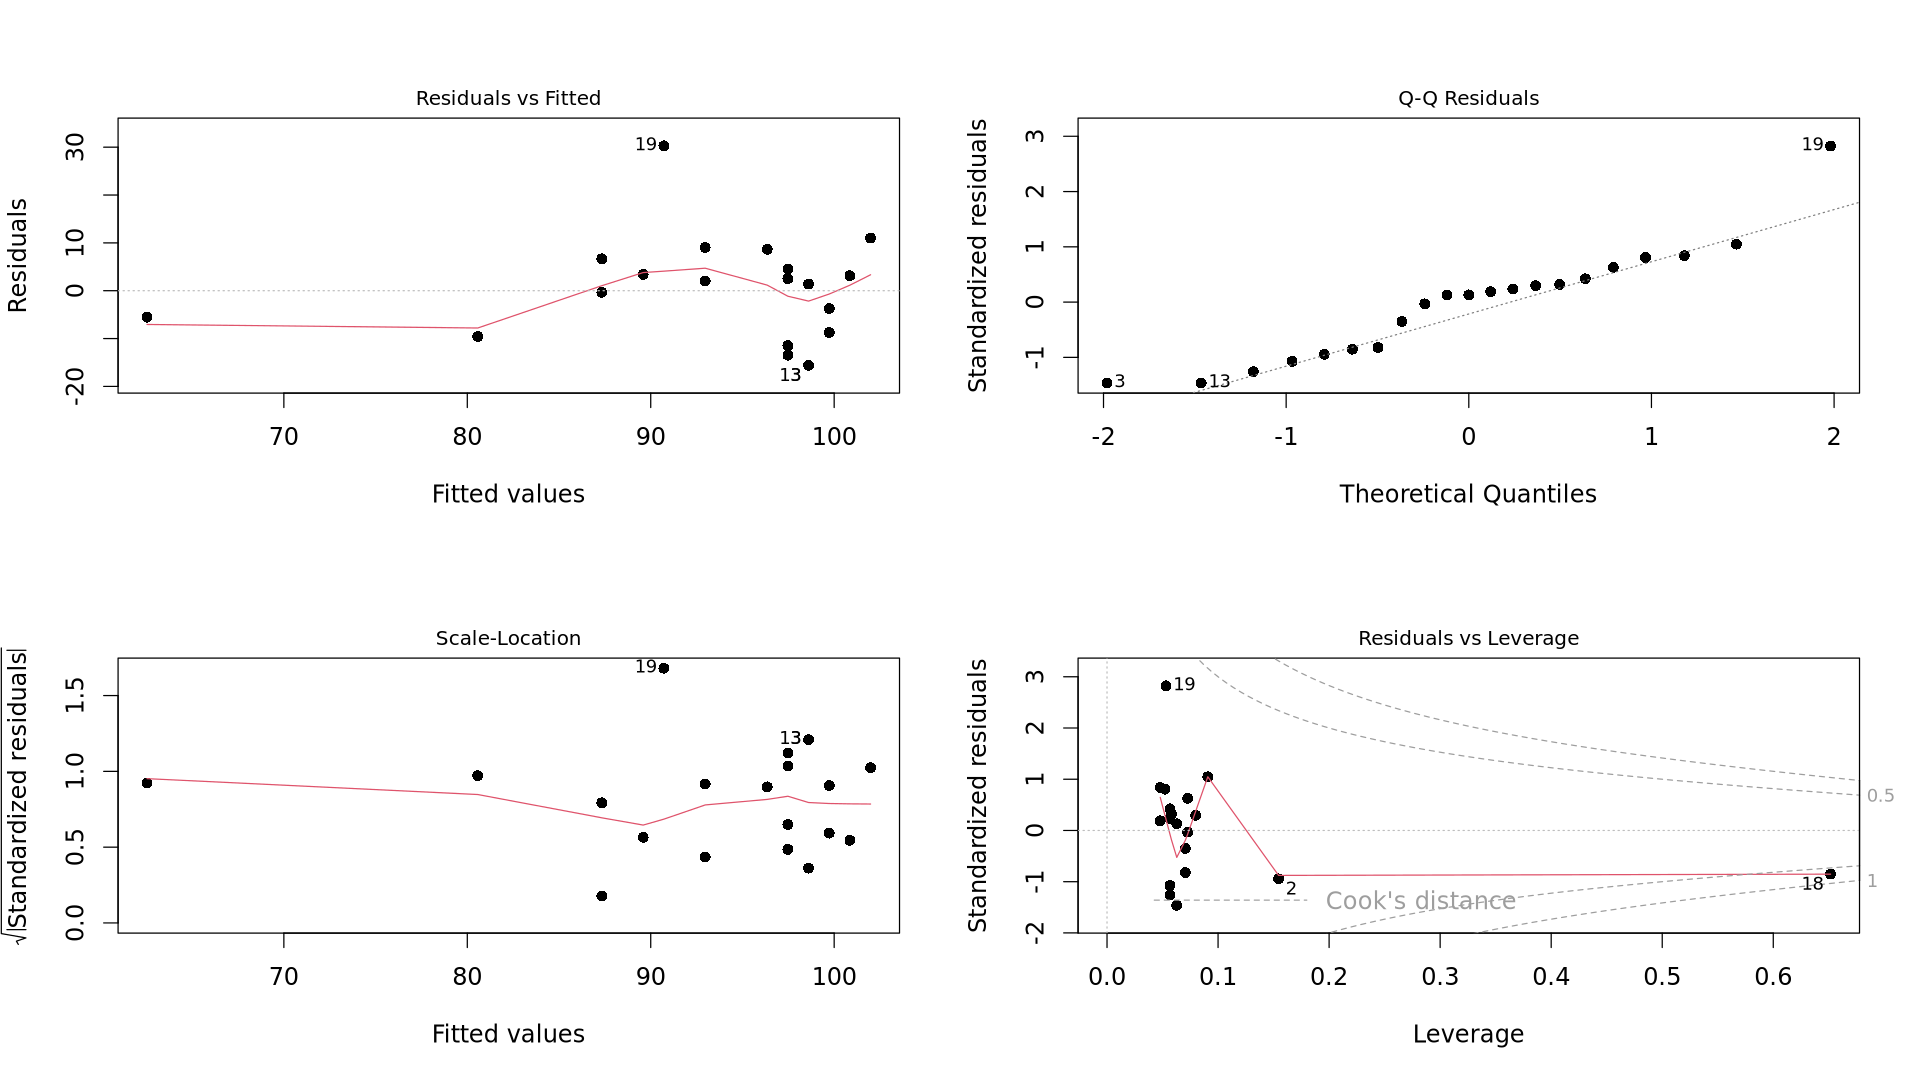

In [33]:
par(mfrow = c(2, 2), cex = 1.2)
plot(model_reg, pch = 16)

순서대로 잔차그림(잔차가 어떤 패턴이 있는지 파악), QQ-plot, 표준화된 잔차 그림, 지렛대점($h_{ii}$)과 Cook's distance

> 19번째 데이터는 이상점, 18번째 데이터는 영향점 및 지렛대점.

### Hitters data로 상기 과정 진행

In [90]:
library(ISLR)
hitters = na.omit(Hitters)  ## drop_na
dim(hitters)
head(hitters)

[1] 263  20

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A


> 263 × 21 matrix

In [91]:
reg_model = lm(Salary ~ AtBat + Hits + HmRun, hitters)
summary(reg_model)


Call:
lm(formula = Salary ~ AtBat + Hits + HmRun, data = hitters)

Residuals:
    Min      1Q  Median      3Q     Max 
-884.75 -214.97  -58.05  175.88 1991.53 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  158.754     75.815   2.094  0.03724 *  
AtBat         -1.564      0.641  -2.440  0.01536 *  
Hits           8.329      2.053   4.056 6.61e-05 ***
HmRun          9.502      3.384   2.808  0.00536 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 398.9 on 259 degrees of freedom
Multiple R-squared:  0.2271,	Adjusted R-squared:  0.2182 
F-statistic: 25.37 on 3 and 259 DF,  p-value: 2.013e-14


In [118]:
cor(hitters[, c(1,2,3,19)])

,AtBat,Hits,HmRun,Salary
AtBat,1.0000000,0.9639691,0.5551022,0.3947709
Hits,0.9639691,1.0000000,0.5306274,0.4386747
HmRun,0.5551022,0.5306274,1.0000000,0.3430281
Salary,0.3947709,0.4386747,0.3430281,1.0000000


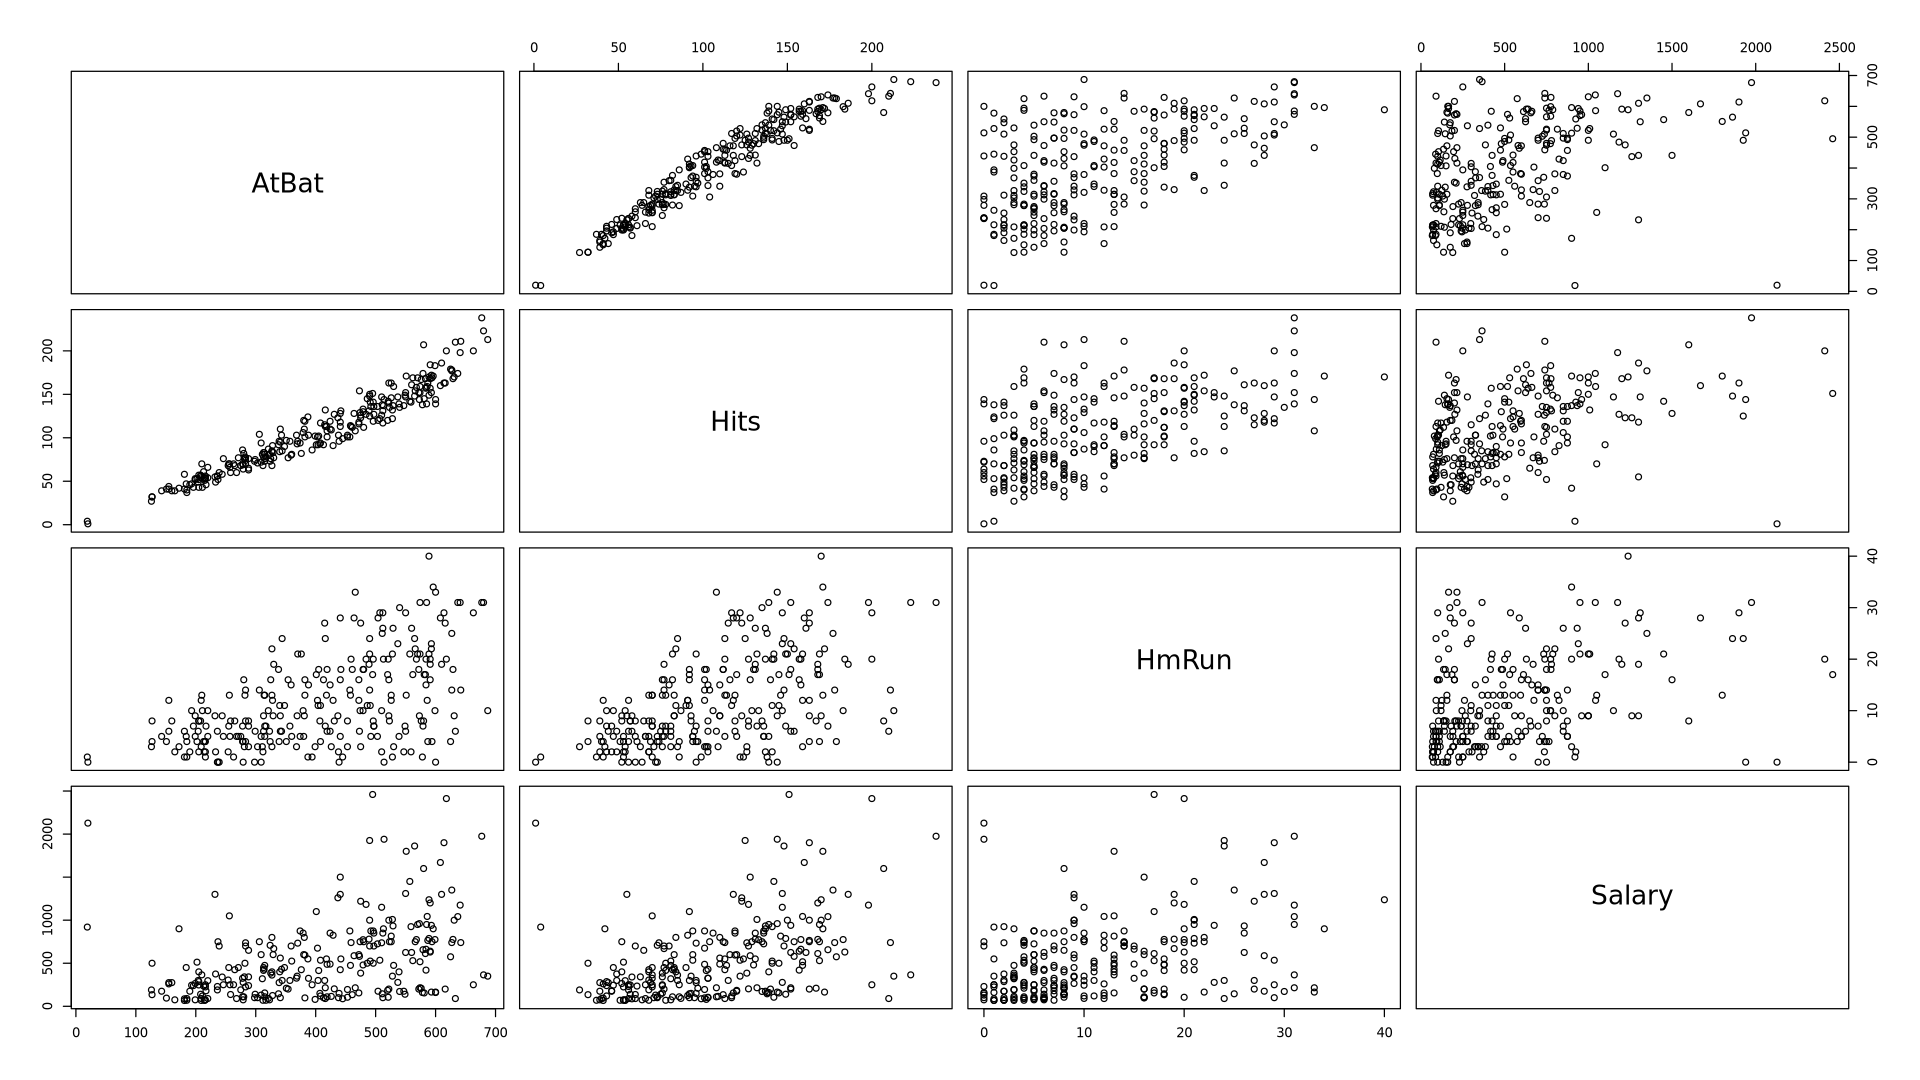

In [93]:
pairs(hitters[, c(1,2,3,19)])

> AtBat와 Hits는 연관이 있어보이죠?

In [99]:
## 아래와 동일한 수식
X = model.matrix(reg_model)
H = X%*%solve(t(X)%*%X)%*%t(X)
## diag(H) == influence(reg_model)$hat) : TRUE

n = nrow(hitters)
p = 3
stand_res = resid(reg_model)/(summary(reg_model)$sigma*sqrt(1-influence(reg_model)$hat))

sigma_i = sqrt(((n-p-1)*summary(reg_model)$sigma^2 - reg_model$residuals^2/(1-diag(H)))/(n-p-2))
stud_res = reg_model$resid/(sigma_i*sqrt(1-diag(H)))

In [102]:
residual = resid(reg_model)
stand_res = rstandard(reg_model)
stud_res = rstudent(reg_model)

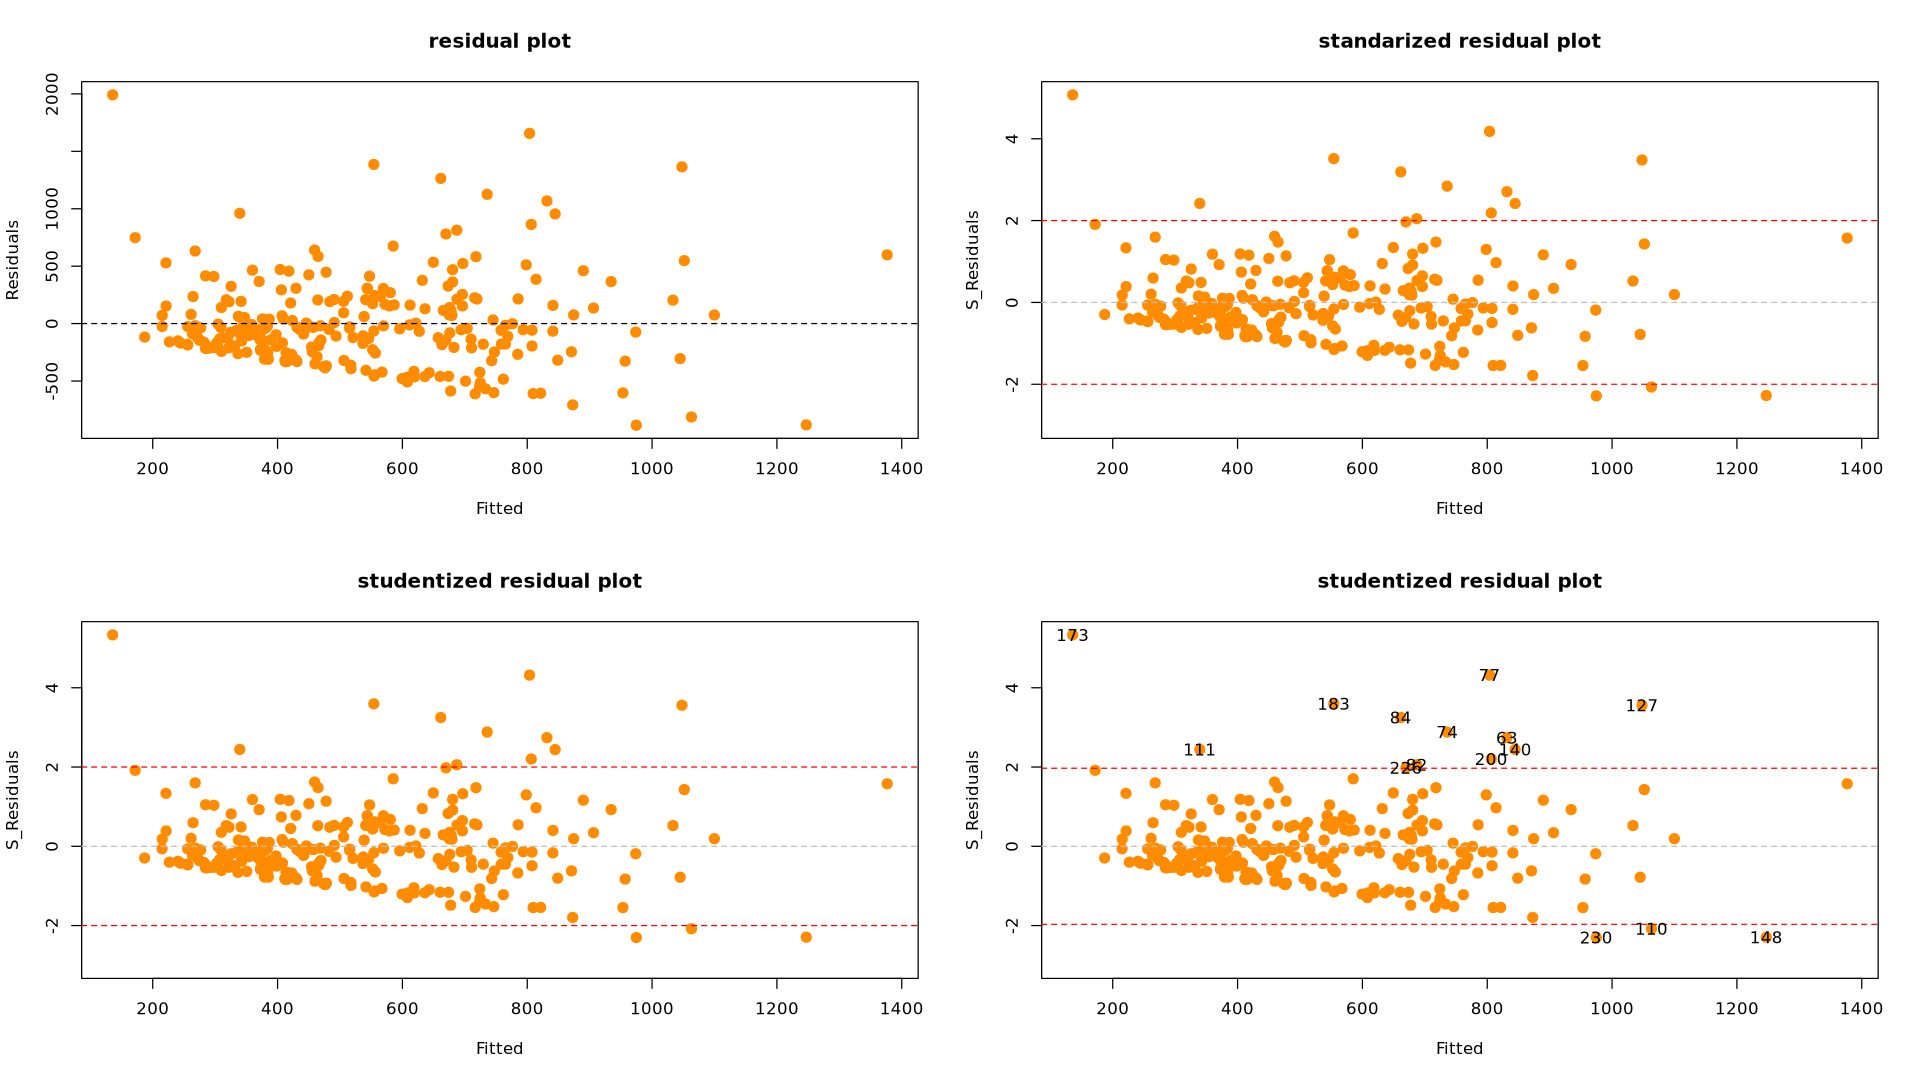

In [112]:
par(mfrow = c(2,2))
## pure residuals
plot(fitted(reg_model), residual,
    pch = 20, cex = 2, col = "darkorange",
    xlab = "Fitted", ylab = "Residuals",
    main = "residual plot")
abline(h = 0, lty = 2)

plot(fitted(reg_model), stand_res,
    pch = 20, cex = 2, col = "darkorange",
    xlab = "Fitted", ylab = "S_Residuals",
    main = "standarized residual plot",
    ylim = c(min(-3, min(stand_res)), max(3, max(stand_res))))
abline(h = c(-2, 0, 2), col = c("red", "grey", "red"), lty = 2)

plot(fitted(reg_model), stud_res,
    pch = 20, cex = 2, col = "darkorange",
    xlab = "Fitted", ylab = "S_Residuals",
    main = "studentized residual plot",
    ylim = c(min(-3, min(stud_res)), max(3, max(stud_res))))
abline(h = c(-2, 0, 2), col = c("red", "grey", "red"), lty = 2)

plot(fitted(reg_model), stud_res,
    pch = 20, cex = 2, col = "darkorange",
    xlab = "Fitted", ylab = "S_Residuals",
    main = "studentized residual plot",
    ylim = c(min(-3, min(stud_res)), max(3, max(stud_res))))
abline(h = c(qt(0.025, n-p-2), 0, qt(0.975, n-p-2)), col = c("red", "grey", "red"), lty = 2)
text(fitted(reg_model)[which(abs(stud_res) >= qt(0.975, n-p-2))],  ## x
    stud_res[which(abs(stud_res) >= qt(0.975, n-p-2))],  ## y
    which(abs(stud_res) >= qt(0.975, n-p-2)))  ## text

> 마지막 플롯을 보면 이상점이 아주 많음.

In [113]:
stud_res[which(abs(stud_res) >= qt(0.975, n-p-2))]

-Dale Murphy    -Dave Winfield     -Eddie Murray     -George Brett 
         2.740338          2.880893          4.318954          2.057822 
     -Gary Carter       -Joe Carter       -Jack Clark         -Jim Rice 
         3.248663         -2.080713          2.442917          3.558398 
 -Keith Hernandez    -Kirby Puckett     -Mike Schmidt      -Ozzie Smith 
         2.440566         -2.293728          5.333664          3.594832 
-Rickey Henderson     -Steve Garvey        -Steve Sax 
         2.202444          1.979316         -2.302013

In [114]:
which(abs(stud_res) >= qt(0.975, n-p-2))

-Dale Murphy    -Dave Winfield     -Eddie Murray     -George Brett 
               63                74                77                82 
     -Gary Carter       -Joe Carter       -Jack Clark         -Jim Rice 
               84               110               111               127 
 -Keith Hernandez    -Kirby Puckett     -Mike Schmidt      -Ozzie Smith 
              140               148               173               183 
-Rickey Henderson     -Steve Garvey        -Steve Sax 
              200               226               230

In [115]:
summary(influence.measures(reg_model))

Potentially influential observations of
	 lm(formula = Salary ~ AtBat + Hits + HmRun, data = hitters) :

                 dfb.1_ dfb.AtBt dfb.Hits dfb.HmRn dffit   cov.r   cook.d
-Don Mattingly    0.01  -0.38     0.42     0.15     0.50_*  1.07_*  0.06 
-Dale Murphy     -0.17   0.11    -0.09     0.24     0.40_*  0.92_*  0.04 
-Dave Winfield   -0.14   0.12    -0.11     0.17     0.34    0.91_*  0.03 
-Eddie Murray     0.06  -0.32     0.36     0.09     0.49_*  0.78_*  0.06 
-George Bell     -0.01  -0.02     0.02     0.02     0.04    1.05_*  0.00 
-Gary Carter     -0.06   0.11    -0.13     0.26     0.38_*  0.88_*  0.03 
-Gary Gaetti      0.01   0.01    -0.01    -0.03    -0.03    1.05_*  0.00 
-Jesse Barfield  -0.01  -0.03     0.02     0.10     0.12    1.06_*  0.00 
-Jack Clark       0.20  -0.03    -0.03     0.06     0.24    0.94_*  0.01 
-Jim Rice        -0.05  -0.43     0.54     0.05     0.67_*  0.87_*  0.11 
-Keith Hernandez -0.02  -0.18     0.25    -0.07     0.34    0.94_*  0.03 
-Kirby 

In [124]:
3*sqrt((p+1)/(n-p-1))  ## r의 알고리즘 기준인듯

[1] 0.3728219

In [119]:
qf(0.5, p+1, n-p-1)

[1] 0.8413752

In [129]:
2*(p+1)/n

[1] 0.03041825

> 후보군들을 추려보고, 영향점을 탐색(DFFITS, Cook's dist)

DFFITS : 많음.

In [126]:
which(abs(dffits(reg_model)) >= 3*sqrt((p+1)/(n-p-1)))  ## 살짝 러프하게... 잡은듯.

-Don Mattingly   -Dale Murphy  -Eddie Murray   -Gary Carter      -Jim Rice 
            62             63             77             84            127 
-Kirby Puckett  -Mike Schmidt   -Ozzie Smith     -Steve Sax    -Wade Boggs 
           148            173            183            230            256

Cook's dist : 해당사항 없음.

In [128]:
which(abs(cooks.distance(reg_model)) >= qf(0.5, p+1, n-p-1))

named integer(0)

hat : 지렛대점

In [133]:
which(abs(hatvalues(reg_model)) >= 3*(p+1)/n)  ## 여기도 살짝 러프하게 잡은듯.

-Don Mattingly -Jesse Barfield  -Kirby Puckett      -Steve Sax  -Vince Coleman 
             62             106             148             230             252 
    -Wade Boggs 
            256

`-` 변수 변환

In [134]:
hitters$log_Salary = log(hitters$Salary)  ## 잔차 그림이 조금 퍼지는 느낌이 있었으니까...

In [135]:
reg_model_2 = lm(log_Salary ~ AtBat + Hits + HmRun, hitters)
summary(reg_model_2)


Call:
lm(formula = log_Salary ~ AtBat + Hits + HmRun, data = hitters)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2664 -0.6572  0.1122  0.5639  2.5886 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.103575   0.149615  34.111  < 2e-16 ***
AtBat       -0.002179   0.001265  -1.722 0.086196 .  
Hits         0.014012   0.004052   3.458 0.000636 ***
HmRun        0.016540   0.006678   2.477 0.013895 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7872 on 259 degrees of freedom
Multiple R-squared:  0.2253,	Adjusted R-squared:  0.2163 
F-statistic:  25.1 on 3 and 259 DF,  p-value: 2.729e-14


In [139]:
residual = resid(reg_model_2)
stad.res = rstandard(reg_model_2)
stu.res = rstudent(reg_model_2)

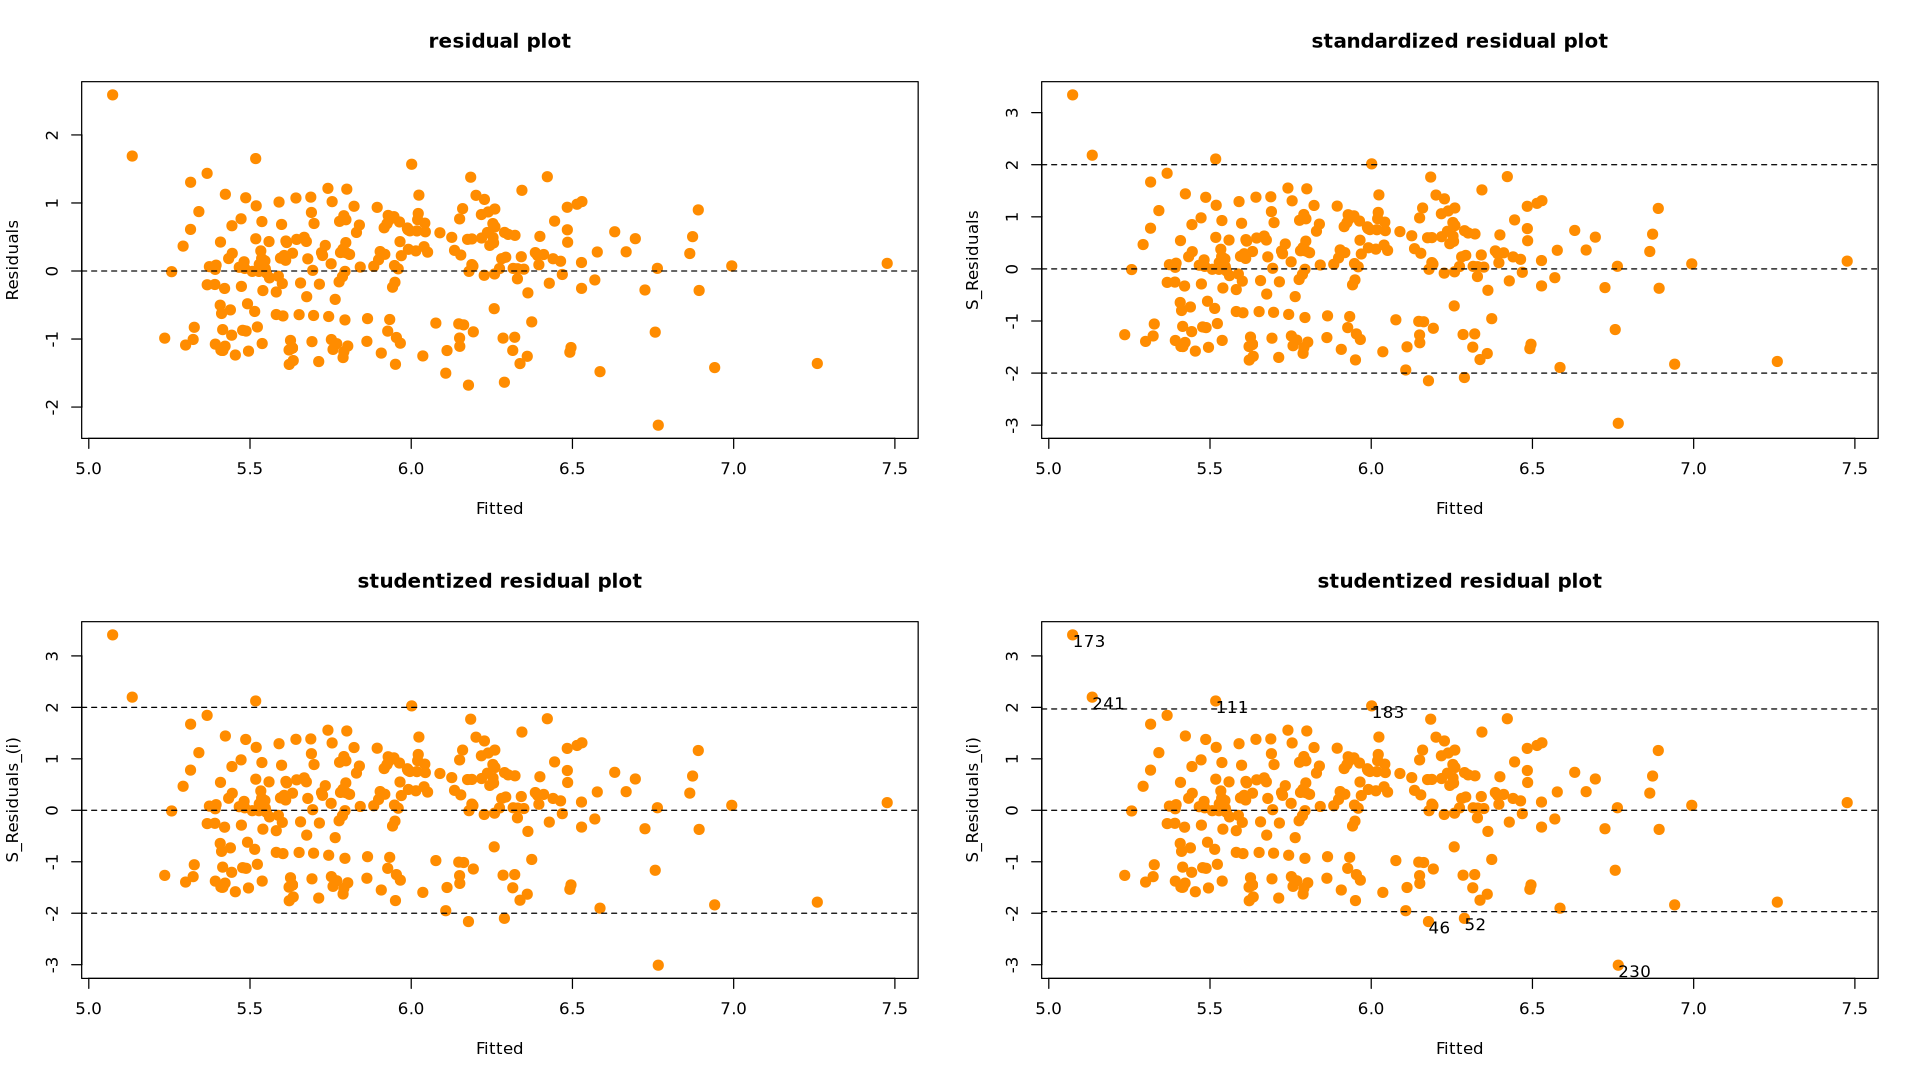

In [140]:
par(mfrow = c(2, 2))
plot(fitted(reg_model_2), residual,
    pch=20,cex = 2,col = "darkorange",
    xlab = "Fitted", ylab = "Residuals",
    main = "residual plot")
abline(h=0, lty=2)
plot(fitted(reg_model_2), stad.res,
    pch=20,cex = 2,col = "darkorange",
    xlab = "Fitted", ylab = "S_Residuals",
    ylim=c(min(-3, min(stad.res)),
    max(3,max(stad.res))),
    main = "standardized residual plot")
abline(h=c(-2,0,2), lty=2)
plot(fitted(reg_model_2), stu.res,
    pch=20,cex = 2,col = "darkorange",
    xlab = "Fitted", ylab = "S_Residuals_(i)",
    ylim=c(min(-3, min(stu.res)),
    max(3,max(stu.res))),
    main = "studentized residual plot")
abline(h=c(-2,0,2), lty=2)
plot(fitted(reg_model_2), stu.res,
    pch=20,cex = 2,col = "darkorange",
    xlab = "Fitted", ylab = "S_Residuals_(i)",
    ylim=c(min(-3, min(stu.res)), max(3,max(stu.res))),
    main = "studentized residual plot")
abline(h=c(-qt(0.975,nrow(hitters)-4),0,qt(0.975,nrow(hitters)-4)), lty=2)
text(fitted(reg_model_2)[which(abs(stu.res)>qt(0.975,nrow(hitters)-4))],
    stu.res[which(abs(stu.res)>qt(0.975,nrow(hitters)-4))],
    which(abs(stu.res)>qt(0.975,nrow(hitters)-4)),adj = c(0,1))

> 아까보다 잔차 그림이 더 안정적임.

In [141]:
stu.res[abs(stu.res) >= qt(0.975, n-p-2)]
which(abs(stu.res) >= qt(0.975, n-p-2))

-Cory Snyder -Darnell Coles    -Jack Clark  -Mike Schmidt   -Ozzie Smith 
     -2.161828      -2.098726       2.123858       3.408270       2.028616 
    -Steve Sax -Terry Kennedy 
     -3.009340       2.198493

-Cory Snyder -Darnell Coles    -Jack Clark  -Mike Schmidt   -Ozzie Smith 
            46             52            111            173            183 
    -Steve Sax -Terry Kennedy 
           230            241

In [142]:
summary(influence.measures(reg_model_2))

Potentially influential observations of
	 lm(formula = log_Salary ~ AtBat + Hits + HmRun, data = hitters) :

                dfb.1_ dfb.AtBt dfb.Hits dfb.HmRn dffit   cov.r   cook.d
-Don Mattingly   0.00  -0.04     0.04     0.01     0.05    1.12_*  0.00 
-George Bell     0.00  -0.01     0.01     0.01     0.02    1.05_*  0.00 
-Gary Gaetti     0.00   0.00     0.00     0.01     0.01    1.05_*  0.00 
-Jesse Barfield -0.01  -0.02     0.01     0.06     0.07    1.06_*  0.00 
-Kirby Puckett   0.04   0.28    -0.32    -0.17    -0.43_*  1.02    0.05 
-Mike Schmidt    0.60  -0.26     0.12     0.03     0.61_*  0.88_*  0.09 
-Spike Owen     -0.02   0.03    -0.03    -0.03     0.04    1.05_*  0.00 
-Steve Sax       0.06   0.38    -0.54     0.34    -0.73_*  0.94_*  0.13 
-Tony Gwynn      0.01   0.05    -0.06     0.02    -0.08    1.06_*  0.00 
-Terry Kennedy   0.40  -0.21     0.11     0.04     0.40_*  0.97    0.04 
-Vince Coleman   0.10  -0.16     0.13     0.14    -0.21    1.06_*  0.01 
-Wade Boggs    

> 변환하기 전보다 훨씬 그 수가 줄어들었음.

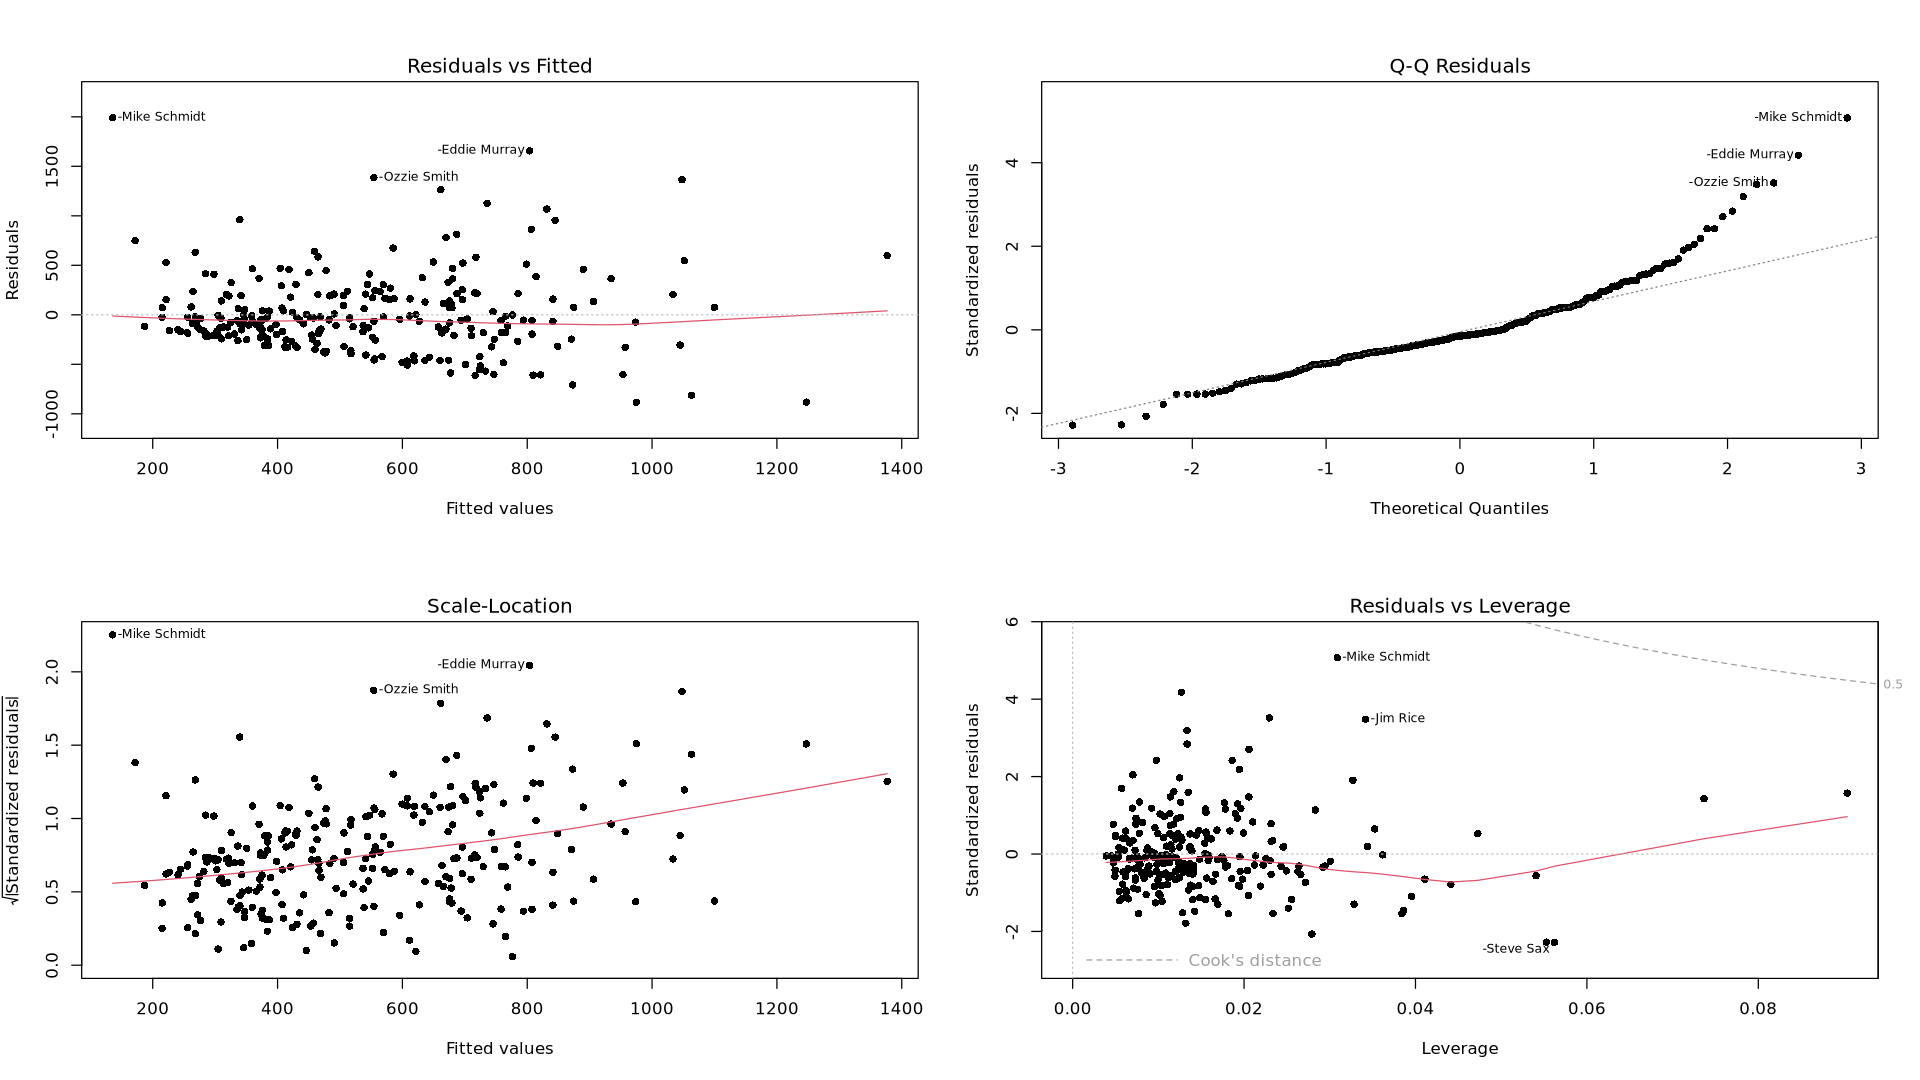

In [143]:
par(mfrow = c(2,2))
plot(reg_model, pch = 16)

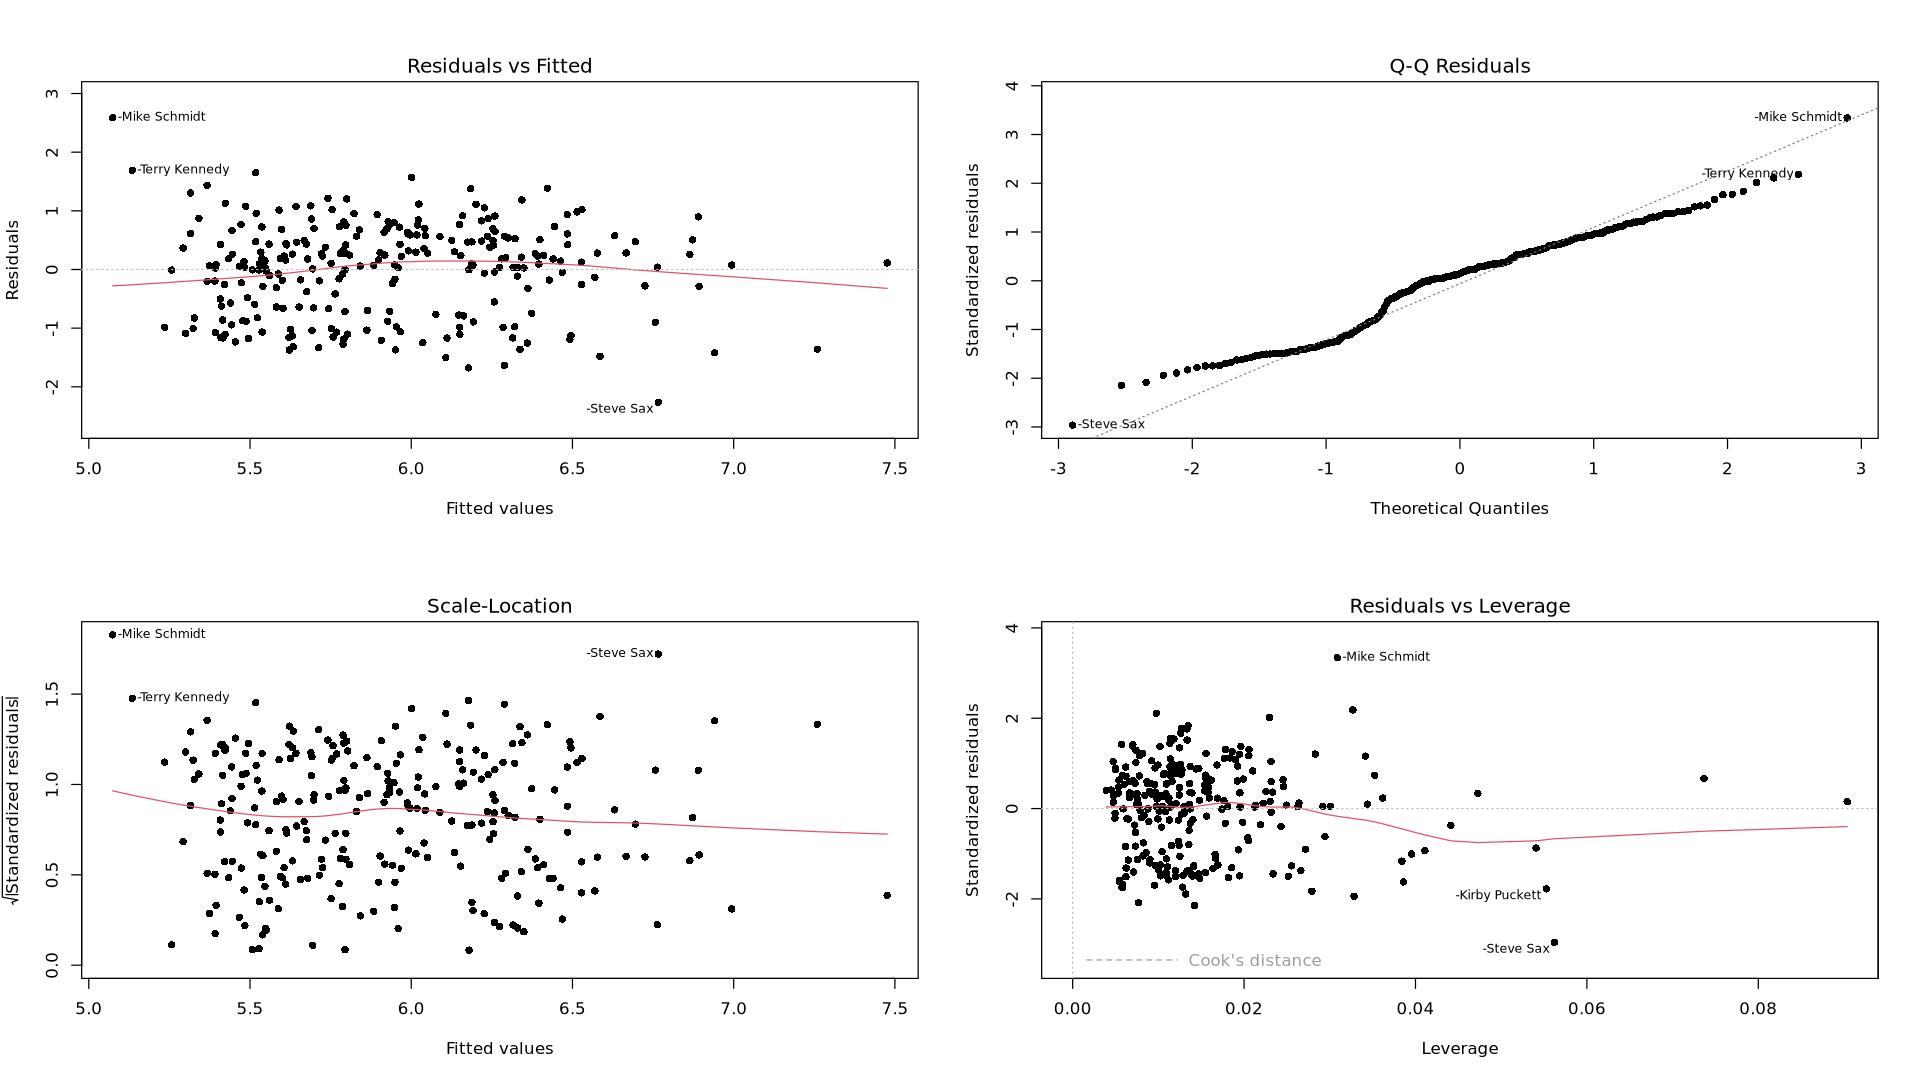

In [145]:
par(mfrow = c(2,2))
plot(reg_model_2, pch = 16)

> 회귀모형 가정에도 더 잘 맞는 것 같음. 이상치도 안보임.